In [1]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Pre Trqined model spacy

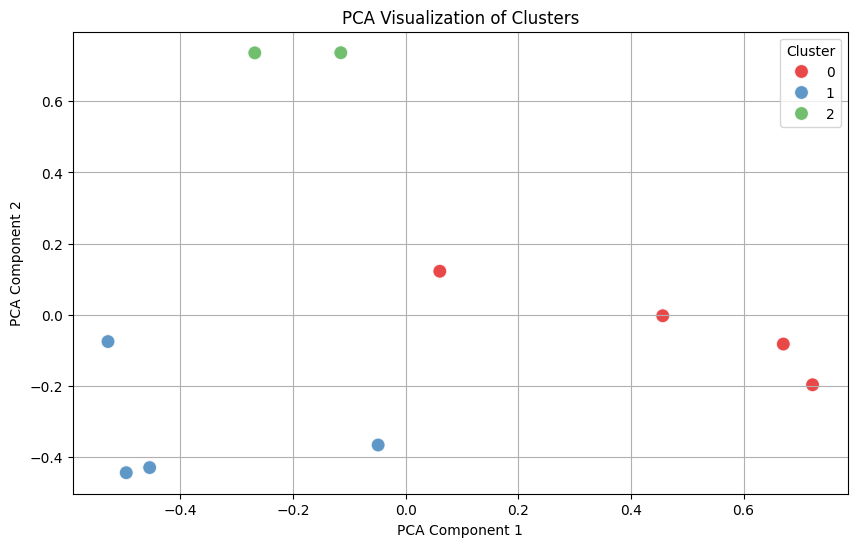

In [3]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = {
    'keyword': [
        'hotel by hour',
        'hotel by hour new york',
        'hotel with pool',
        'day pass hotel',
        'day pass pool',
        'hotel day use',
        'hotel early check in',
        'hotel with spa',
        'hotel with spa miami',
        'hotel with spa new york'
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Load spaCy model for tokenization
nlp = spacy.load("en_core_web_sm")

# Tokenize and preprocess keywords using spaCy
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc]
    return " ".join(tokens)

df['processed_keyword'] = df['keyword'].apply(preprocess_text)

# Create TF-IDF vectorizer and fit-transform on the processed keywords
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_keyword'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Create DataFrame with PCA results and clusters
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot clusters using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.8, edgecolor='w')
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


Cluster 0: ['day pass hotel', 'day pass pool', 'hotel day use']
Cluster 1: ['hotel with pool', 'hotel early check in', 'hotel with spa', 'hotel with spa miami', 'hotel with spa new york']
Cluster 2: ['hotel by hour with cats huah', 'hotel by hour new york']


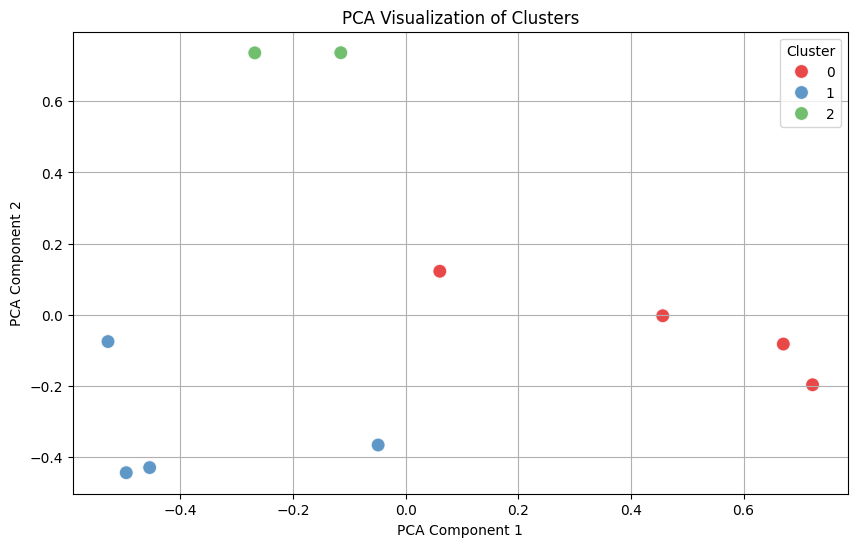

In [8]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = {
    'keyword': [
        'hotel by hour with cats huah',
        'hotel by hour new york',
        'hotel with pool',
        'day pass hotel',
        'day pass pool',
        'hotel day use',
        'hotel early check in',
        'hotel with spa',
        'hotel with spa miami',
        'hotel with spa new york'
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Load spaCy model for tokenization
nlp = spacy.load("en_core_web_sm")

# Tokenize and preprocess keywords using spaCy
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc]
    return " ".join(tokens)

df['processed_keyword'] = df['keyword'].apply(preprocess_text)

# Create TF-IDF vectorizer and fit-transform on the processed keywords
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_keyword'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add clusters to DataFrame
df['cluster'] = clusters

# Display keywords in each cluster
for cluster_id in sorted(df['cluster'].unique()):
    cluster_keywords = df[df['cluster'] == cluster_id]['keyword'].tolist()
    print(f"Cluster {cluster_id}: {cluster_keywords}")

# Plot clusters using seaborn (optional)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.8, edgecolor='w')
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


In [9]:
df

,keyword,processed_keyword,cluster
0,hotel by hour with cats huah,hotel by hour with cats huah,2
1,hotel by hour new york,hotel by hour new york,2
2,hotel with pool,hotel with pool,1
3,day pass hotel,day pass hotel,0
4,day pass pool,day pass pool,0
5,hotel day use,hotel day use,0
6,hotel early check in,hotel early check in,1
7,hotel with spa,hotel with spa,1
8,hotel with spa miami,hotel with spa miami,1
9,hotel with spa new york,hotel with spa new york,1


Cluster 0: ['hotel with pool', 'day pass hotel', 'day pass pool', 'hotel day use', 'dayuse', 'dqy use']
Cluster 1: ['hotel by hour new york', 'hotel with spa', 'hotel with spa miami', 'hotel with spa new york']
Cluster 2: ['hotel by hour', 'hotel early check in']


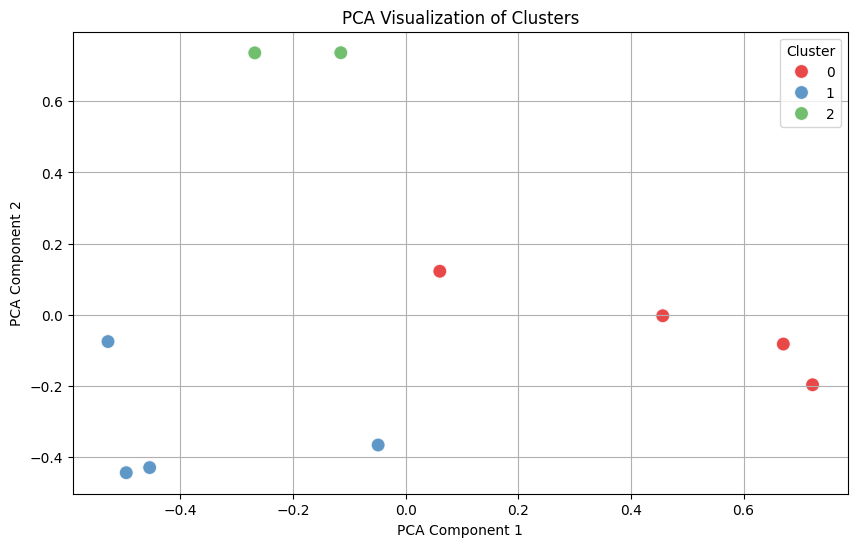

In [10]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = {
    'keyword': [
        'hotel by hour',
        'hotel by hour new york',
        'hotel with pool',
        'day pass hotel',
        'day pass pool',
        'hotel day use',
        'hotel early check in',
        'hotel with spa',
        'hotel with spa miami',
        'hotel with spa new york',
        "dayuse",
        "dqy use"
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Load spaCy model for tokenization
nlp = spacy.load("en_core_web_sm")

# Tokenize and preprocess keywords using spaCy
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

df['processed_keyword'] = df['keyword'].apply(preprocess_text)

# Create TF-IDF vectorizer and fit-transform on the processed keywords
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_keyword'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add clusters to DataFrame
df['cluster'] = clusters

# Display keywords in each cluster
for cluster_id in sorted(df['cluster'].unique()):
    cluster_keywords = df[df['cluster'] == cluster_id]['keyword'].tolist()
    print(f"Cluster {cluster_id}: {cluster_keywords}")

# Plot clusters using seaborn (optional)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.8, edgecolor='w')
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


In [12]:
import spacy

nlp = spacy.load("en_core_web_sm")

# Example text
text = "hotel in Miami with a pool."

# Process the text
doc = nlp(text)

# Extract entities
for ent in doc.ents:
    print(ent.text, ent.label_)


Miami GPE


In [ ]:
#from nltk.tag import StanfordNERTagger
#from nltk.tokenize import word_tokenize

# Path to Stanford NER model and jar file
#stanford_ner_model = 'path_to/stanford-ner-2020-11-17/classifiers/english.muc.7class.distsim.crf.ser.gz'
#stanford_ner_jar = 'path_to/stanford-ner-2020-11-17/stanford-ner.jar'

# Initialize Stanford NER Tagger
##ner_tagger = StanfordNERTagger(stanford_ner_model, stanford_ner_jar, encoding='utf-8')

# Example text
#text = "I want to find a hotel in Miami with a pool."

# Tokenize the text
#tokens = word_tokenize(text)

# Tag the named entities
#entities = ner_tagger.tag(tokens)

# Filter for cities
#cities = [entity[0] for entity in entities if entity[1] == 'LOCATION']

#print("Cities:", cities)


BERT

In [2]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# ! pip install tensorflow transformers


In [3]:
from transformers import BertTokenizer, TFBertForTokenClassification
import tensorflow as tf

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)

# Example dataset (replace with your own dataset)
train_texts = ["I want to find a hotel in Miami with a pool."]
train_labels = [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]  # Example: 1 for 'LOCATION' (assuming 'miami' is annotated as 'LOCATION')

# Define num_labels based on your dataset
num_labels = 3  # Adjust this number according to your dataset's number of labels

# Load model with specific num_labels
model = TFBertForTokenClassification.from_pretrained(model_name, num_labels=num_labels)

# Tokenize input text and convert labels to tensors
tokenized_inputs = tokenizer(train_texts, padding=True, truncation=True, return_tensors="tf")
train_labels_tensor = tf.constant(train_labels)

# Define optimizer and compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Fine-tune model
model.fit(tokenized_inputs, train_labels_tensor, epochs=3, batch_size=1)

# Example inference after fine-tuning
inputs = tokenizer("I want to find a hotel in Miami with a pool.", return_tensors="tf")
outputs = model(inputs)
predicted_labels = tf.argmax(outputs.logits, axis=-1).numpy()[0]

# Map labels back to entities
entities = [(token, model.config.id2label[label]) for token, label in zip(tokenizer.convert_ids_to_tokens(inputs["input_ids"].numpy()[0]), predicted_labels) if model.config.id2label[label] != 'O']

# Filter out 'LOCATION' entities
cities = [entity[0] for entity in entities if entity[1] == 'LOCATION']

print("Predicted Labels:", predicted_labels)
print("Entities:", entities)
print("Cities:", cities)


All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


: 

In [ ]:
from transformers import BertTokenizer, TFBertForTokenClassification
import tensorflow as tf

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)

# Example dataset (replace with your own dataset)
train_texts = ["I want to find a hotel in Miami with a pool."]
train_labels = [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]  # Example: 1 for 'LOCATION' (assuming 'miami' is annotated as 'LOCATION')

# Define num_labels based on your dataset
num_labels = 2  # Adjust this number according to your dataset's number of labels

# Load model with specific num_labels
model = TFBertForTokenClassification.from_pretrained(model_name, num_labels=num_labels)

# Tokenize input text and convert labels to tensors
tokenized_inputs = tokenizer(train_texts, padding=True, truncation=True, return_tensors="tf")
train_labels_tensor = tf.constant(train_labels)

# Define optimizer and compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Fine-tune model
model.fit(tokenized_inputs, train_labels_tensor, epochs=3, batch_size=1)

# Example inference after fine-tuning
inputs = tokenizer("I want to find a hotel in Miami with a pool.", return_tensors="tf")
outputs = model(inputs)
predicted_labels = tf.argmax(outputs.logits, axis=-1).numpy()[0]

# Map labels back to entities
entities = [(token, model.config.id2label[label]) for token, label in zip(tokenizer.convert_ids_to_tokens(inputs["input_ids"].numpy()[0]), predicted_labels) if model.config.id2label[label] != 'O']

# Filter out 'LOCATION' entities
cities = [entity[0] for entity in entities if entity[1] == 'LOCATION']

print("Predicted Labels:", predicted_labels)
print("Entities:", entities)
print("Cities:", cities)


OPTION 2

In [3]:
# Example dataset (keywords and their thematic categories)
dataset = [
    ("hotel by hour", "brand"),
    ("hotel by hour new york", "brand"),
    ("hotel with pool", "amenity"),
    ("day pass hotel", "daypass"),
    ("day pass pool", "daypass"),
    ("hotel day use", "brand"),
    ("hotel early check in", "brand"),
    ("hotel with spa", "amenity"),
    ("hotel with spa miami", "amenity"),
    ("hotel with spa new york", "amenity"),
]


2. Tokenize Keywords

In [4]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize each keyword and create training data
tokenized_inputs = []
labels = []

for keyword, category in dataset:
    tokenized_keyword = tokenizer(keyword, return_tensors='tf')
    tokenized_inputs.append(tokenized_keyword)
    labels.append(category)

print("Number of tokenized inputs:", len(tokenized_inputs))
print("Number of labels:", len(labels))


c:\Users\rober\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of tokenized inputs: 10
Number of labels: 10


In [ ]:
3. Fine-Tuning BERT for Token Classification


In [5]:
import tensorflow as tf
from transformers import TFBertForTokenClassification

# Define model
model = TFBertForTokenClassification.from_pretrained('bert-base-uncased', num_labels=len(set(labels)))

# Prepare dataset as TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": tf.concat([input_ids["input_ids"] for input_ids in tokenized_inputs], axis=0),
     "attention_mask": tf.concat([input_ids["attention_mask"] for input_ids in tokenized_inputs], axis=0)},
    tf.keras.utils.to_categorical(tf.keras.preprocessing.LabelEncoder().fit_transform(labels))
)).batch(1)

# Compile model
optimizer = tf.keras.optimizers.Adam(lr=2e-5)
model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Fine-tune model
model.fit(train_dataset, epochs=3, batch_size=1)

# Example inference
example_input = tokenizer("hotel with spa in Miami", return_tensors="tf")
output = model.predict(example_input)
predicted_label = tf.argmax(output, axis=-1).numpy()[0]

print("Predicted Label:", predicted_label)


All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


InvalidArgumentError: {{function_node __wrapped__ConcatV2_N_10_device_/job:localhost/replica:0/task:0/device:CPU:0}} ConcatOp : Dimension 1 in both shapes must be equal: shape[0] = [1,5] vs. shape[1] = [1,7] [Op:ConcatV2] name: concat